In [4]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, minimize

file = pd.read_csv('./spectrum/Nanya_ITO_grading.csv')
#ITO = pd.read_csv('./spectrum/Nanya_layer1_R_5.csv')['SCAN'].values
R_ITO = pd.read_csv('./spectrum/ToS_ITO_R4_30_3.csv')['SCAN'].values

In [10]:
void = ml.Non_Dispersion(1)
w = file['nm'].values
sub =  pd.read_csv('./spectrum/TEO/sodalime.csv')
soda_n = sub['n'].values
soda_k = sub['k'].values
sodalime_Nanya_TEO = ml.Material(w, soda_n, soda_k, w)

wl = np.linspace(400, 700, 301)

n_T = file['n_Top'].values
k_T = file['k_Top'].values
n_B = file['n_Bottom'].values
k_B = file['k_Bottom'].values
ITO_T = ml.Material(w, n_T, k_T, w)
ITO_B = ml.Material(w, n_B, k_B, w)

SiO2_1 = pd.read_csv('./spectrum/TEO/SiO2_1.csv')
SiO21n = SiO2_1['n'].values
SiO21k = SiO2_1['k'].values
SiO2_TEO = ml.Material(w, SiO21n, SiO21k, w)

NB_1 = pd.read_csv('./spectrum/TEO/NB_1.csv')
NBn = NB_1['n'].values
NBk = NB_1['k'].values
NB = ml.Material(w, NBn, NBk, w)

model = lambda th: tm.Design(
    [void, ITO_T, ITO_B, sodalime_Nanya_TEO],
    [None, th[0], th[1], None]
).reflectance(wl, 5)

fom1 = lambda th: sum(abs(100*model(th)-R_ITO))

In [15]:
sol1 = differential_evolution(fom1,[(0,120),(0,120)])
print(sol1.x)

[84.60479107 31.52369393]


0.2659717029260441


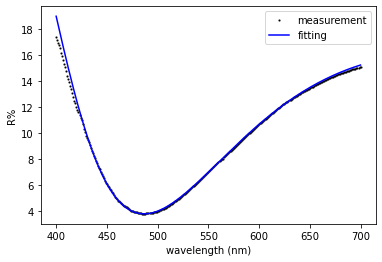

In [15]:
f1 = [24.11619727,92.95584248]
m1 = [84.50993049,31.61075733]
plt.plot(wl, R_ITO, 'ks', label = 'measurement', markersize = 1)
plt.plot(wl, 100*model(m1), '-b', label = 'fitting')

plt.legend(loc = 'best')
plt.xlabel('wavelength (nm)')
plt.ylabel('R%')
#plt.savefig('ITO.png')
print(tm.RMSE( R_ITO, 100*model(m1)))
plt.show()

In [144]:
R_L2 = pd.read_csv('./spectrum/ToS_layer2_R4_30_3.csv')['SCAN'].values
SiO2 = lambda th: ml.Cauchy([th[0],th[1]])

model2 = lambda th: tm.Design(
    [void, ITO_T, ITO_B, SiO2_TEO, sodalime_Nanya_TEO],
    [None, f1[0],f1[1], th[0], None]
).reflectance(wl, 5)

fom2 = lambda th: tm.RMSE(100*model2(th), R_L2)

In [145]:
sol2 = differential_evolution(fom2, [(0,100)])
print(sol2.x)

[0.]


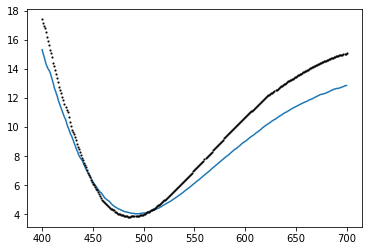

In [122]:
plt.plot(wl, 100*model2(0))
plt.plot(wl, R_L2)
plt.plot(wl, R_ITO, 'ks', label = 'measurement', markersize = 1)
plt.show()

In [147]:
R_L3 = pd.read_csv('./spectrum/ToS_layer3_R4_30_3.csv')['SCAN'].values
SiO2 = lambda th: ml.Cauchy([th[0],th[1]])

model3 = lambda th: tm.Design(
    [void, ITO_T, ITO_B, sodalime_Nanya_TEO, NB, sodalime_Nanya_TEO],
    [None, 84.60479107,31.52369393, th[0], th[1],None]
).reflectance(wl, 5)

model3_tra = lambda th: tm.Design(
    [void, ITO_T, ITO_B, sodalime_Nanya_TEO, NB, sodalime_Nanya_TEO],
    [None, 84.60479107,31.52369393, th[0], th[1],None]
).reflectance(wl, 5)

fom3 = lambda th: tm.RMSE(100*model3(th), R_L3)

In [136]:
sol3 = differential_evolution(fom3, [(0,100),(0,50)])
print(sol3.x)

[26.72317309 41.27363465]


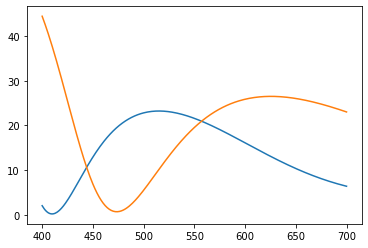

0.13792741021270535
0.14445460665232257
0.1927932831742068


In [153]:
plt.plot(wl, 100*model3(sol3.x))
plt.plot(wl, 100*model3_tra(sol.x))
#plt.plot(wl, R_L3)
plt.show()
print(np.mean(abs(model3_tra(sol.x)-model3(sol3.x))))
print(np.mean(model3(sol3.x)))
print(np.mean(model3_tra(sol.x)))


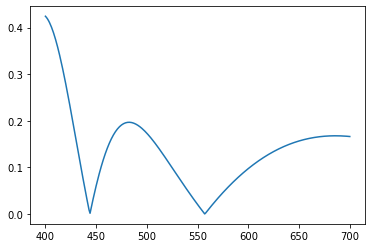

In [155]:
plt.plot(wl, abs(model3_tra(sol.x)-model3(sol3.x)))
plt.show()